<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-BrendaZurazy/blob/main/Copia_Redneuronal_Equipo04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   Alejandro Emmanuel Silva Ortega A01794545
*   Jesús Ramseths Echeverría Rivera A01794630
*   Marco Antonio Arellano Hernández. A00377571
*   Brenda Zurazy Rodriguez Pérez. A01793984
*   Eduardo Saborío Sánchez A01794374


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import  cross_validate,  RepeatedKFold
from sklearn.metrics import make_scorer
from sklearn.impute import SimpleImputer
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.inspection import permutation_importance
from scipy.stats import loguniform
# Omitimos los warnings de scikitlearn
import warnings
warnings.filterwarnings("ignore")

#**Ejercicio-1.** 

In [ ]:
#descomentar las siguientes lineas si se usa colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Local Data
data = pd.read_csv("/content/drive/MyDrive/MNA/IA/dataset_Facebook.csv", delimiter=';')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [ ]:
#data = pd.read_csv("/content/drive/MyDrive/MNA/IA/dataset_Facebook.csv", delimiter=';')
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


**Renombra dicha variable como “LPE” y como variables de entrada selecciona las 7 variables que indican los autores del artículo:**
 Moro, S., Rita, P., & Vala, B. (2016). Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach. Journal of Business Research, 69(9), 3341–3351. https://0-doi-org.biblioteca-ils.tec.mx/10.1016/j.jbusres.2016.02.010.

In [ ]:
data.rename(columns={'Lifetime People who have liked your Page and engaged with your post':'LPE'}, inplace = True)

In [ ]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


Conforme al algoritmo de minería de datos que cita el artículo de  Moro, S., Rita, P., & Vala, B las siguientes 7 variables son las que se utilizaron para obtener los resultado publicados:

In [ ]:
data = data[['Category', 'Page total likes', 'Type', 'Post Month', 'Post Hour', 'Post Weekday', 'Paid', 'LPE']].copy()
data.head()

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid,LPE
0,2,139441,Photo,12,3,4,0.0,119
1,2,139441,Status,12,10,3,0.0,1108
2,3,139441,Photo,12,3,3,0.0,132
3,2,139441,Photo,12,10,2,1.0,1386
4,2,139441,Photo,12,3,2,0.0,396


In [ ]:
#Resumen de la base que utilizaremos en la tarea
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          500 non-null    int64  
 1   Page total likes  500 non-null    int64  
 2   Type              500 non-null    object 
 3   Post Month        500 non-null    int64  
 4   Post Hour         500 non-null    int64  
 5   Post Weekday      500 non-null    int64  
 6   Paid              499 non-null    float64
 7   LPE               500 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 31.4+ KB


In [ ]:
#Revisando las variables que tienen valores null
data.isnull().mean()*100

Category            0.0
Page total likes    0.0
Type                0.0
Post Month          0.0
Post Hour           0.0
Post Weekday        0.0
Paid                0.2
LPE                 0.0
dtype: float64

El analisis de datos nulos arroja que existe 1 variable con valores nulos, esta es 'Paid'. 

Para evitar pérdida de información se imputara esta variable usando SimpleImputer con la estrategia *most_frequent*

In [ ]:
#Información estadística de la base de datos
data.describe(include=object)

,Type
count,500
unique,4
top,Photo
freq,426


In [ ]:
#Clasificando las variables de la base de datos
exit_col = 'LPE'
cat_cols = ['Type','Category','Paid']
date_cols = ['Post Month','Post Weekday','Post Hour']
performance_cols = ['Page total likes']

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

#**Ejercicio-2.**

**Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y
validación.**

In [ ]:
# Partición de los datos con 100 datos de Prueba y el resto para entrenamiento y validación
Xtv, X_test, ytv, y_test = train_test_split(X, y, test_size=100, random_state=42)

#**Ejercicio-3.**

**Definición de funciones de errores.**

In [ ]:
#Función: Raíz del Error Cuadrático Medio
def mi_rmse(y_true, y_pred):
  """
    Calcula el Root Mean Square Error (RMSE) entre dos series.
    
    Args:
        y_true: Serie de Pandas con los valores reales.
        y_pred: Serie de Pandas con los valores predichos.
        
    Returns:
        float: El valor del RMSE.
  """
  mse = np.mean((y_true - y_pred) ** 2)
  rmse = np.sqrt(mse)
  return rmse

In [ ]:
#Función Promedio de los Errores Absolutos
def mi_mae(y_true, y_pred):
    """
    Calcula el Mean Absolute Error (MAE) entre dos series.
    
    Args:
        y_true: Serie de Pandas con los valores reales.
        y_pred: Serie de Pandas con los valores predichos.
        
    Returns:
        float: El valor del MAE.
    """
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

In [ ]:
#Función Promedio de los Errores Porcentuales Absolutos
def mi_mape(y_true, y_pred):
    """
    Calcula el Mean Absolute Percentage Error (MAPE) entre dos series.
    
    Args:
        y_true: Serie de Pandas con los valores reales.
        y_pred: Serie de Pandas con los valores predichos.
        
    Returns:
        float: El valor del MAPE.
    """
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape


#**Ejercicio-4.**

**Análisis de datos / transformaciones para los datos de entrada y salida.**

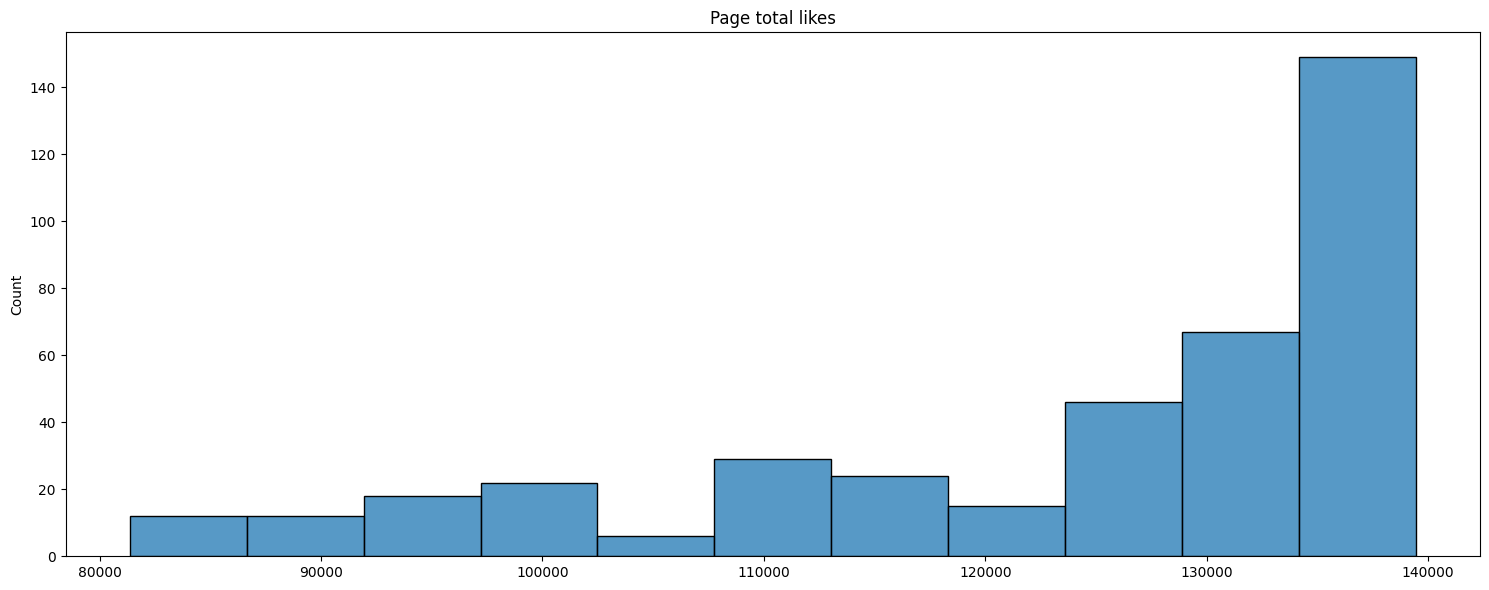

In [ ]:
# Análisis de las variables performance
fig, axes = plt.subplots(1, 1, figsize=(15,6)) 
#axes = axes.ravel()
#for col, ax in zip(performance_cols):
sns.histplot(data = Xtv, x=performance_cols[0]).set(title=f'{performance_cols[0]}', xlabel=None)
fig.tight_layout()
plt.show()

La varialble 'Page total likes' que es métrica que se utilizó en el artículo antes mencionado para medir el impacto de la publicación tiene un sesgo positivo, es decir, existe un conjunto de valores altos de esta variable en comparación con la mayoría de las observaciones.

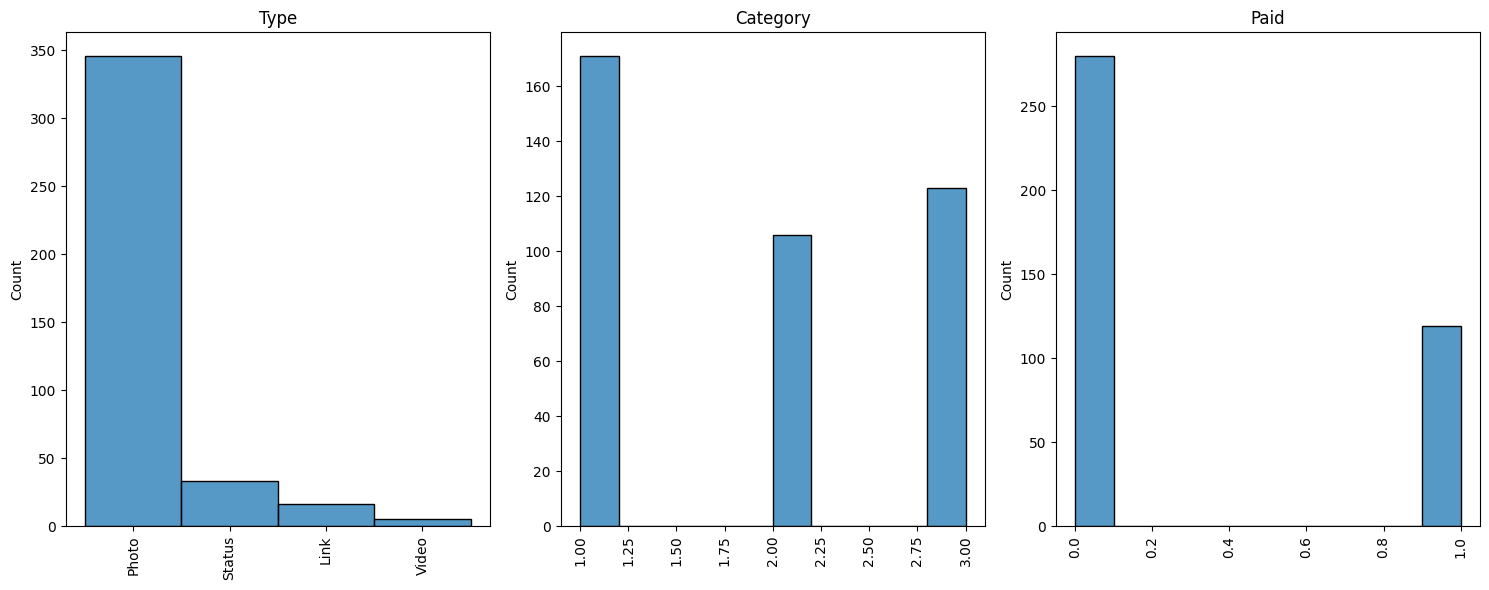

In [ ]:
# Análisis de las variables categoricas
fig, axes = plt.subplots(1, 3, figsize=(15,6)) 
axes = axes.ravel()
for col, ax in zip(cat_cols, axes):
  sns.histplot(data = Xtv, x=col, ax=ax)
  ax.set(title=f'{col}', xlabel=None) 
  ax.tick_params(axis='x',rotation=90) 
  fig.tight_layout()
plt.show()

Respeto a la variable **'type'**, observamos que tipo de contenido con mayor frecuencia son las fotos, mientras que video es el que tiene menor frecuencia y citando al artículo es importante destacar que esta variable fue considerada como la característica más relevante para el modelo, ya que obtuvo una relevancia del 36%.

La variable **'Category'** vemos que el tipo de contenido mas frecuente es la catalogada como acción (ofertas especiales y concursos), seguido de la inspiración (contenido no explícito relacionado con la marca) y finalmente la categoria con menor frecuencia es la de producto (publicidad directa, contenido de marca explícito).

Con la variable **'Paid'** Observamos que en su mayoría las empresas pagaron a Facebook por la publicidad de sus productos. 

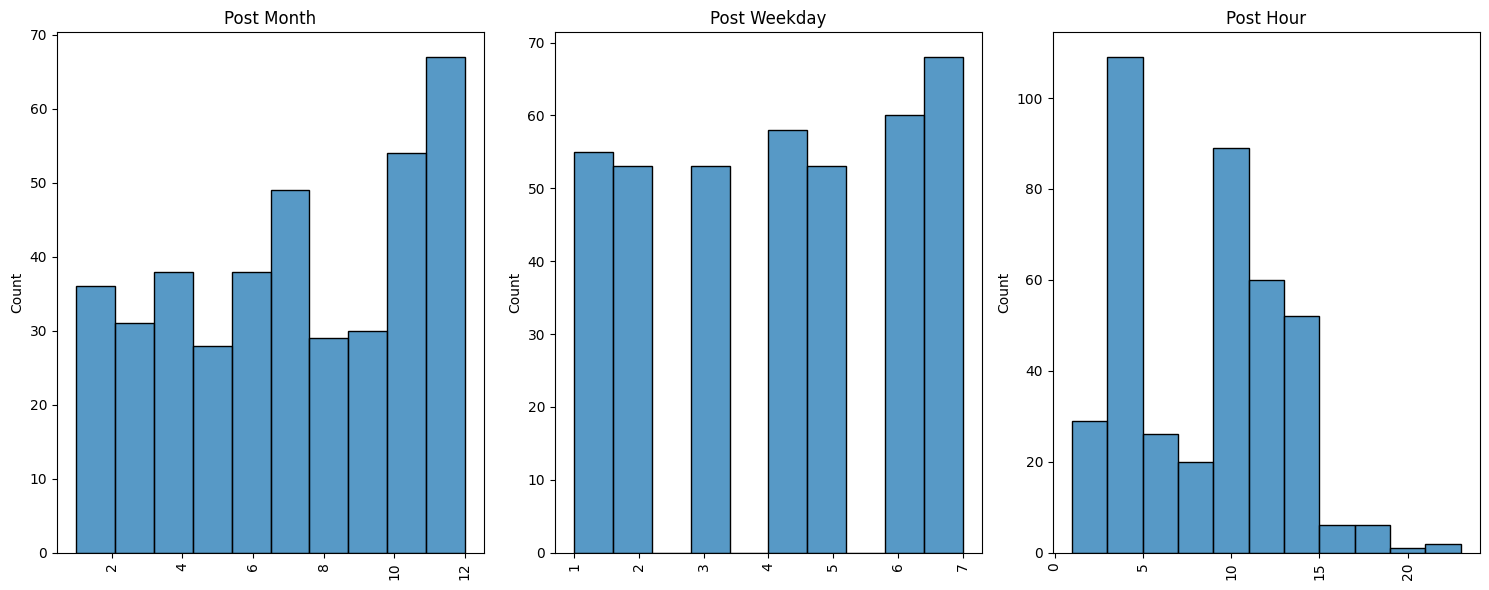

In [ ]:
# Análisis de las variables date
fig, axes = plt.subplots(1, 3, figsize=(15,6)) 
axes = axes.ravel()
for col, ax in zip(date_cols, axes):
  sns.histplot(data = Xtv, x=col, ax=ax)
  ax.set(title=f'{col}', xlabel=None) 
  ax.tick_params(axis='x',rotation=90) 
  fig.tight_layout()
plt.show()

La variable 'Post month' en la mayoría de los meses se encuentra entre 30 y 40 publicaciónes, sin embargo, es evidente que en el mes de diciembre la publicación en facebook incrementa de manera significtiva.

En la variable 'post weekday' vemos que los días domingo y sábado son los días donde el número de publicacioes es mayor.

Con la variable 'Post hour' observmos que la mayoria de los pots se publican antes de las primeras 10 horas del día.

**Finalmente después de análisis de variables se decidió hacer una transformación y escalamiento para las variables numéricas usando StandardScaler y MinMax.** 

**Mientras que para las variables categóricas se usará OneHotEncoder para tener consistencia en las variables.**

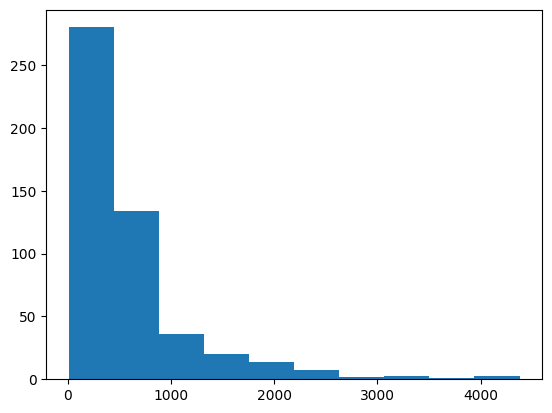

In [ ]:
# Análisis de la variable de salida
plt.hist(y)
plt.show()

Dado que la variable de salida, LPE, tiene sesgo negativo, se le aplicara una transformacion logaritmica + 1 para tener un mejor resultado en los modelos.

In [ ]:
# Transformaciones one-hot 
ohe_pipeline = Pipeline(steps = [("impMode", SimpleImputer(strategy="most_frequent")),
                                        ('OneHotE', OneHotEncoder(drop='first',  handle_unknown="ignore"))])

numeric_pipeline = Pipeline(steps = [("impMediana", SimpleImputer(strategy="median")),
                            ('scale', MinMaxScaler())])
catMap_pipe = Pipeline(steps=([('catmap',FunctionTransformer(my_type))]))
mapvar = ['Type']

columnasTransformer = ColumnTransformer(transformers = [('perfcols', numeric_pipeline, performance_cols),
                                                        ('catmap',catMap_pipe,mapvar),
                                                        ('catcols',ohe_pipeline, cat_cols),
                                                        ('datecols',ohe_pipeline, date_cols)
                                                        ],
                                        remainder='passthrough')

In [ ]:
columnasTransformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('perfcols',
                                 Pipeline(steps=[('impMediana',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', MinMaxScaler())]),
                                 ['Page total likes']),
                                ('catmap',
                                 Pipeline(steps=[('catmap',
                                                  FunctionTransformer(func=<function my_type at 0x7fabf1490430>))]),
                                 ['Type']),
                                ('catcols',
                                 Pipeline(steps=[('impMode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHotE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Type', 'Category', 'Paid']),
                                ('datecols',
                                 Pipeline(steps=[('impMode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHotE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Post Month', 'Post Weekday', 'Post Hour'])])

In [ ]:
#Label encoder para variable Type
def my_type(x):
    x['Type'] = x['Type'].map({'Photo':1,'Status':2, 'Link':0, 'Video':0})
    return x

#Transformacion para variable de salida y su inversa
def my_log(y):
    tmp = np.log(1+y)
    return tmp

def my_invlog(y):
    tmp=np.exp(y) -1
    return tmp

#**Ejercicio-5.**

**Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de datos de entrenamiento y validación.**

**Para ello particiónalos en 100 para validación y 300 para entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y validación.**

In [ ]:
#Partición de datos
X_train, X_val, y_train, y_val = train_test_split(Xtv, ytv, train_size=300, random_state=3)
ytv

249    287
433    865
19     100
322    319
332    306
      ... 
106    328
270    975
348    403
435    472
102    205
Name: LPE, Length: 400, dtype: int64

In [ ]:
#Utilizando la función Dummy
X_train, X_val, y_train, y_val = train_test_split(Xtv, ytv, train_size=300, random_state=3)

y_trainLog = my_log(y_train)
y_valLog = my_log(y_val)
X_trainFTf = columnasTransformer.fit_transform(X_train)
X_valFTf = columnasTransformer.transform(X_val)

modeloDummy = DummyRegressor()
#modeloDummy.fit(X_trainFTf, y_train)
modeloDummy.fit(X_trainFTf,y_trainLog)

yhat_val = modeloDummy.predict(X_valFTf)
yhat_train = modeloDummy.predict(X_trainFTf)

In [ ]:
dummy_metrics = []
print(f'Val RMSE: {mi_rmse(y_valLog, yhat_val)}')
dummy_metrics.append(['Val RMSE', mi_rmse(y_valLog, yhat_val)])
print(f'Val MAE: {mi_mae(y_valLog, yhat_val)}')
dummy_metrics.append(['Val MAE', mi_mae(y_valLog, yhat_val)])
print(f'Val MAPE: {mi_mape(y_valLog, yhat_val)}')
dummy_metrics.append(['Val MAPE', mi_mape(y_valLog, yhat_val)])

print(f'Train RMSE: {mi_rmse(y_trainLog, yhat_train)}')
dummy_metrics.append(['Train RMSE', mi_rmse(y_trainLog, yhat_train)])
print(f'Train MAE: {mi_mae(y_trainLog, yhat_train)}')
dummy_metrics.append(['Train MAE', mi_mae(y_trainLog, yhat_train)])
print(f'Train MAPE: {mi_mape(y_trainLog, yhat_train)}')
dummy_metrics.append(['Train MAPE', mi_mape(y_trainLog, yhat_train)])

Val RMSE: 0.7066335619867035
Val MAE: 0.4966320594801823
Val MAPE: 8.118731878389356
Train RMSE: 0.8628260843268166
Train MAE: 0.6149596259232538
Train MAPE: 11.13402640580596


En las tres medidas decreció su valor en el conjunto de validación en comparación con el conjunto de entrenamiento.

Como sabemos que en todas las medidas utilizadas si el valor decrece indica que el modelo está produciendo predicciones más precisas ya que mientras más pequeño es su valor, más cercanos son los valores predichos y observados.

#**Ejercicio-6.**

**Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada (RepeatedKFold)**

In [ ]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Lineal Múltiple:
  modelos.append(LinearRegression())
  nombres.append('Regresión Lineal')
 
  # RF - Random Forest:
  modelos.append(RandomForestRegressor())
  nombres.append('Random Forest')

  # MLP - Perceptrón Multicapa:
  
  modelos.append(MLPRegressor())
  nombres.append('Perceptrón Multicapa')

  return modelos, nombres

In [ ]:
# Se cargan los modelos y nombres
modelos, nombres = get_models()
resultados = list()   

ytvLog = my_log(ytv)
y_testLog = my_log(y_test)


for i in range(len(modelos)):

  pipeline = make_pipeline((columnasTransformer),(modelos[i]))

  cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

  mismetricas = {'RMSE': make_scorer(mi_rmse), 'MAE': make_scorer(mi_mae), 'MAPE' : make_scorer(mi_mape)}
  scores = cross_validate(pipeline, Xtv, np.ravel(ytvLog), scoring=mismetricas, cv=cv, return_train_score=True)
  resultados.append(scores)

  print("Modelo: %s" % nombres[i])
  print('Métricas de entrenamiento >> \nRMSE promedio: %.3f (%.4f)\nMAE promedio: %.3f (%.4f)\nMAPE promedio: %.3f (%.4f)\n' % (
                                                                                                                    np.mean(scores['train_RMSE']),
                                                                                                                    np.std(scores['train_RMSE']),
                                                                                                                    np.mean(scores['train_MAE']),
                                                                                                                    np.std(scores['train_MAE']), 
                                                                                                                    np.mean(scores['train_MAPE']),
                                                                                                                    np.std(scores['train_MAPE'])
                                                                                                                    ))
  
  print('Métricas de validación >> \nRMSE promedio: %.3f (%.4f)\nMAE promedio: %.3f (%.4f)\nMAPE promedio: %.3f (%.4f)\n' % (
                                                                                                                    np.mean(scores['test_RMSE']),
                                                                                                                    np.std(scores['test_RMSE']),
                                                                                                                    np.mean(scores['test_MAE']),
                                                                                                                    np.std(scores['test_MAE']), 
                                                                                                                    np.mean(scores['test_MAPE']),
                                                                                                                    np.std(scores['test_MAPE'])
                                                                                                                    ))

Modelo: Regresión Lineal
Métricas de entrenamiento >> 
RMSE promedio: 0.635 (0.0229)
MAE promedio: 0.441 (0.0156)
MAPE promedio: 7.869 (0.3567)

Métricas de validación >> 
RMSE promedio: 0.745 (0.0930)
MAE promedio: 0.521 (0.0534)
MAPE promedio: 9.309 (1.6128)

Modelo: Random Forest
Métricas de entrenamiento >> 
RMSE promedio: 0.287 (0.0119)
MAE promedio: 0.196 (0.0075)
MAPE promedio: 3.512 (0.1639)

Métricas de validación >> 
RMSE promedio: 0.745 (0.0911)
MAE promedio: 0.516 (0.0530)
MAPE promedio: 9.247 (1.5085)

Modelo: Perceptrón Multicapa
Métricas de entrenamiento >> 
RMSE promedio: 0.743 (0.0287)
MAE promedio: 0.536 (0.0269)
MAPE promedio: 9.443 (0.5035)

Métricas de validación >> 
RMSE promedio: 0.887 (0.0735)
MAE promedio: 0.645 (0.0543)
MAPE promedio: 11.349 (1.6278)



1. **Regresión lineal** los valores de la métrica del conjunto de entrenamiento son menores, es decir obtenemos un mejor ajuste en este conjunto pero con una diferencia pequeña, podemos concluir que el modeo tiene quezá un error asociado a la varianza de los datos, donde éste puede mitigarse agregando más datos en el entrenamiento para que el modelo siga aprendiendo, no obstante aun los valores que se obtienen en el conjunto de validación son aceptables estadísticamente tomando en cuenta que los modelos siempre tienen un error irreducible (ruido natural de los datos) por lo tanto este podría ser un buen modelo para la clasificación de los datos que como se menciona anteriormente posible mejorar.


2. **Random Forest** Este modelo tiene una mejora significativa entre el conjunto de entrenamiento y validación, la diferencia entre las medidas obtenidas en los conjuntos son grandes, podriamos concluir en este caso que el modelo está generalizando la información de los datos bastante bien, no obstante el modelo de regresión se mantiene con mejor RMSE y MAE.


3. **Perceptrón Multicapa** Los resultados obtenidos son parecidos a los que se tienen en la regresión lineal, es decir los valores entre el conjunto de entrenamiento y validación son similares, siendo mejores en el conjunto de validación pero aun así con posibilidad de mejorar, sin embargo es importante mencionar que los puntajes siguen siendo mejores en a regresión lineal que en el perceptrón muticapa.


Finalmente en base al error porcentual absoluto medio (MAPE) (debido a que es una métrica sencilla y de fácil interpretación ya que expresa la exactitud como un porcentaje) tenemos lo siguiente:


*   MAPE de la regresión lineal 9.3 
*   MAPE de Random Forest 9.2
*   MAPE del perceptrón multicapa 11.3

Podemos inferir que Random Forest es el modelo con el que se obtienen las mejores predicciones reduciendo el error en un 2% respecto al perceptrón multicapa y es mejor que el modelo de regresión lineal por 0.1%.

#**Ejercicio-7.**

**Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación obtenidos.**

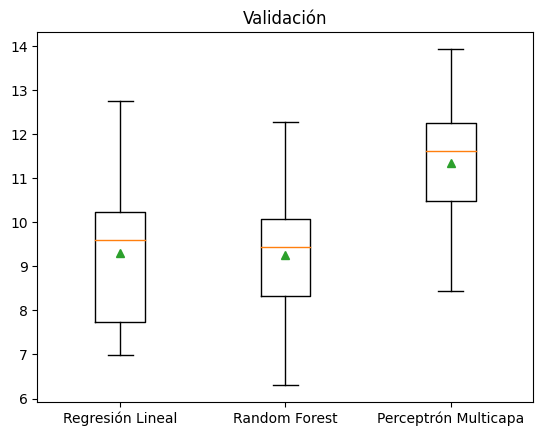

In [ ]:
# Diagrama de caja y bigotes
# Validación
mape_r = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_MAPE']
  mape_r.append(rr)
plt.boxplot(mape_r, labels = nombres, showmeans = True)
plt.title('Validación')
plt.show()

En el artículo de Moro, S., Rita, P., & Vala, B menciona en sus conclusiones que los mejores rendimeinto obtenidos son con un porcentaje de error absoluto medio del 27,2% y del 26,9%, respectivamente y comparando con los primeros resultados obtenidos en este ejecicio observamos que están muy por arriba de los obtenidos en este ejercicio, pero recordemos que este ejercicio trabaja con una muestra de los datos mientras que los autores del artículo usan el todal de los datos.

#**Ejercicio-8.**

**Busca los mejores hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”.**

In [ ]:
# Crea el Pipeline con el ColumnTransformer y el modelo.
pipe = Pipeline(steps=[
    ('preprocessor', columnasTransformer),
    ('MLP', MLPRegressor())
])

# Definir los hiperparámetros a buscar
param_grid ={
   'MLP__hidden_layer_sizes': [(100,),(10,10,10)],
   'MLP__alpha': [0.0001,0.001],
   'MLP__learning_rate_init':[0.001,0.00001,0.000001],
   'MLP__max_iter': [200,10000],
   'MLP__activation': ['tanh', 'relu'],
   'MLP__solver':['sgd','adam'],
   'MLP__learning_rate':['constant','adaptive'] 
}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, scoring=make_scorer(mi_mape), cv=5, n_jobs=-1)
grid_search.fit(Xtv, ytvLog)

# Obtener los mejores parámetros y el mejor score
best_params_MLP = grid_search.best_params_
best_score_MLP = grid_search.best_score_

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(best_params_MLP)
print("Mejor desempeño (MAPE):", best_score_MLP)

Mejores hiperparámetros encontrados:
{'MLP__activation': 'tanh', 'MLP__alpha': 0.001, 'MLP__hidden_layer_sizes': (10, 10, 10), 'MLP__learning_rate': 'adaptive', 'MLP__learning_rate_init': 1e-05, 'MLP__max_iter': 200, 'MLP__solver': 'adam'}
Mejor desempeño (MAPE): 109.15143025257086


#**Ejercicio-9.**

**Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores**

Feature: 0, Score: 0.00039
Feature: 1, Score: 0.02957
Feature: 2, Score: -0.00418
Feature: 3, Score: 0.00871
Feature: 4, Score: -0.00659
Feature: 5, Score: -0.06494
Feature: 6, Score: 0.03026
Feature: 7, Score: -0.00630
Feature: 8, Score: -0.03627
Feature: 9, Score: -0.03921
Feature: 10, Score: -0.03269
Feature: 11, Score: -0.03896
Feature: 12, Score: -0.03712
Feature: 13, Score: -0.00116
Feature: 14, Score: 0.00018
Feature: 15, Score: -0.00008
Feature: 16, Score: 0.00413
Feature: 17, Score: -0.01207
Feature: 18, Score: -0.01444
Feature: 19, Score: 0.02717
Feature: 20, Score: 0.00967
Feature: 21, Score: 0.03581
Feature: 22, Score: 0.00351
Feature: 23, Score: 0.00670
Feature: 24, Score: 0.00538
Feature: 25, Score: 0.00469
Feature: 26, Score: 0.01326
Feature: 27, Score: 0.01369
Feature: 28, Score: 0.00157
Feature: 29, Score: 0.00157
Feature: 30, Score: 0.00608
Feature: 31, Score: 0.00312
Feature: 32, Score: 0.00589
Feature: 33, Score: 0.03502
Feature: 34, Score: 0.01515
Feature: 35, Scor

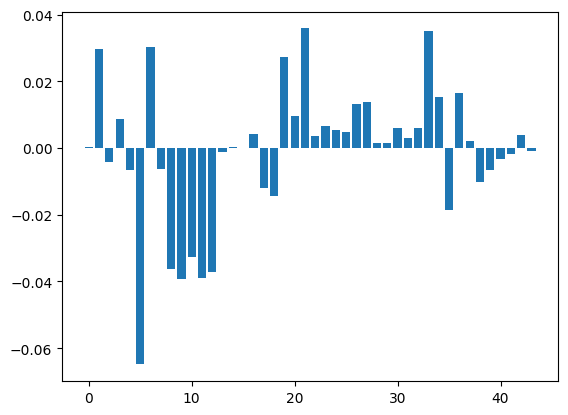

In [ ]:
Xx = columnasTransformer.fit_transform(Xtv)

modelo_MLP = MLPRegressor(hidden_layer_sizes=best_params_MLP['MLP__hidden_layer_sizes'],
                          max_iter=best_params_MLP['MLP__max_iter'],
                          alpha=best_params_MLP['MLP__alpha'],
                          learning_rate_init=best_params_MLP['MLP__learning_rate_init'],
                          activation=best_params_MLP['MLP__activation'],
                          solver=best_params_MLP['MLP__solver'],
                          learning_rate=best_params_MLP['MLP__learning_rate'])

modelo_MLP.fit(Xx.toarray(), np.ravel(ytvLog))

importance_MLP = permutation_importance(modelo_MLP, Xx.toarray(), np.ravel(ytvLog), n_repeats=100)

for i, v in enumerate(importance_MLP['importances_mean']):
    print('Feature: %0d, Score: %.5f' % (i, v))

plt.bar([x for x in range(len(importance_MLP['importances_mean']))], importance_MLP['importances_mean']),
importance_MLP['importances_mean']
plt.show()

Como el análisis se hace sobre los datos que tienen transformaciones, incluyendo el OneHotEncoding obtenemos 43 factores, y ninguno de ellos parece ser relevante ya que ninguno supera ni el 5% de relevancia.

#**Ejercicio-10.**

**Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores hiperparámetros**

In [ ]:
# Crea el Pipeline con el ColumnTransformer y el modelo.
pipe = Pipeline(steps=[
    ('preprocessor', columnasTransformer),
    ('RF', RandomForestRegressor())
])

# Definir los hiperparámetros a buscar
param_grid ={'RF__bootstrap': [True, False],
 'RF__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'RF__max_features': ['auto', 'sqrt'],
 'RF__min_samples_leaf': [1, 2, 4],
 'RF__min_samples_split': [2, 5, 10],
 'RF__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
#grid_search = GridSearchCV(pipe, param_grid, scoring=make_scorer(mi_mape), cv=5, n_jobs=-1)
grid_search = RandomizedSearchCV(pipe, param_grid, scoring=make_scorer(mi_mape), cv=5, n_jobs=-1)

grid_search.fit(Xtv, ytvLog)

# Obtener los mejores parámetros y el mejor score
best_params_RF = grid_search.best_params_
best_score_RF = grid_search.best_score_

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(best_params_RF)
print("Mejor desempeño (MAPE):", best_score_RF)

Mejores hiperparámetros encontrados:
{'RF__n_estimators': 1400, 'RF__min_samples_split': 5, 'RF__min_samples_leaf': 2, 'RF__max_features': 'auto', 'RF__max_depth': 70, 'RF__bootstrap': False}
Mejor desempeño (MAPE): 10.276334597879805


Feature: 0, Score: 41205.15715
Feature: 1, Score: -186565.59948
Feature: 2, Score: -776.59343
Feature: 3, Score: -186001.11204
Feature: 4, Score: 9257.80589
Feature: 5, Score: -35788.07751
Feature: 6, Score: 51655.11169
Feature: 7, Score: 10417.24055
Feature: 8, Score: -33388.77380
Feature: 9, Score: -3013.73439
Feature: 10, Score: -1018.75591
Feature: 11, Score: 391.93075
Feature: 12, Score: -7924.26053
Feature: 13, Score: 2827.36994
Feature: 14, Score: 6905.86509
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 3207.34590
Feature: 19, Score: -9360.05697
Feature: 20, Score: -5412.04486
Feature: 21, Score: -5841.72331
Feature: 22, Score: -11638.90244
Feature: 23, Score: -992.55871
Feature: 24, Score: -1173.55542
Feature: 25, Score: 14257.69841
Feature: 26, Score: -15840.62272
Feature: 27, Score: 28883.50560
Feature: 28, Score: -13926.93851
Feature: 29, Score: -1102.15071
Feature: 30, Score: 0.00000
Feature: 31, Score: -1833.27985
F

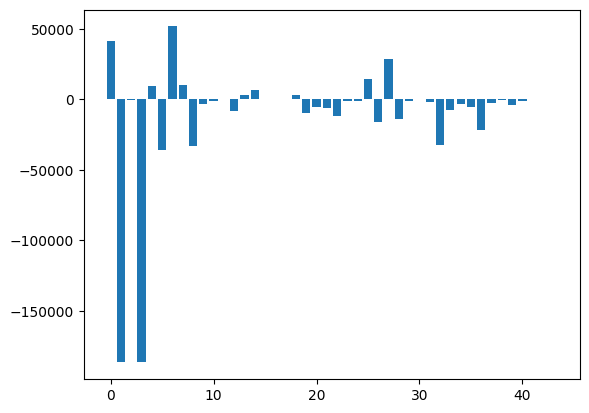

In [ ]:
Xx = columnasTransformer.fit_transform(Xtv)

modelo_RF = RandomForestRegressor(bootstrap=best_params_RF['RF__bootstrap'],
                                  max_depth = best_params_RF['RF__max_depth'],
                                  max_features = best_params_RF['RF__max_features'],
                                  min_samples_leaf = best_params_RF['RF__min_samples_leaf'],
                                  min_samples_split = best_params_RF['RF__min_samples_split'],
                                  n_estimators = best_params_RF['RF__n_estimators']
    
                                    )

modelo_RF.fit(Xx.toarray(), np.ravel(ytv))

importance_RF = permutation_importance(modelo_RF, Xx.toarray(), np.ravel(ytvLog), n_repeats=100)

for i, v in enumerate(importance_RF['importances_mean']):
    print('Feature: %0d, Score: %.5f' % (i, v))

plt.bar([x for x in range(len(importance_RF['importances_mean']))], importance_RF['importances_mean']),
importance_RF['importances_mean']
plt.show()

#**Ejercicio-11.**

**Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados)**

In [ ]:
# Crea el Pipeline con el ColumnTransformer y el modelo.
pipe = Pipeline(steps=[
    ('preprocessor', columnasTransformer),
    ('LR',LinearRegression())
])


# Definir los hiperparámetros a buscar
param_grid ={'LR__fit_intercept': [True , False]
            
             
             }

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, scoring=make_scorer(mi_mape), cv=5, n_jobs=-1)
grid_search.fit(Xtv, ytvLog)

# Obtener los mejores parámetros y el mejor score
best_params_LR= grid_search.best_params_
best_score_LR = grid_search.best_score_

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(best_params_LR)
print("Mejor desempeño (MAPE):", best_score_LR)



Mejores hiperparámetros encontrados:
{'LR__fit_intercept': False}
Mejor desempeño (MAPE): 10.398147426855683


Feature: 0, Score: 0.54363
Feature: 1, Score: 0.41865
Feature: 2, Score: 0.00965
Feature: 3, Score: 0.03901
Feature: 4, Score: 0.19886
Feature: 5, Score: 0.00029
Feature: 6, Score: -0.00030
Feature: 7, Score: 0.00092
Feature: 8, Score: 0.02641
Feature: 9, Score: 0.07050
Feature: 10, Score: 0.02083
Feature: 11, Score: 0.05177
Feature: 12, Score: 0.15692
Feature: 13, Score: 0.27062
Feature: 14, Score: 0.19481
Feature: 15, Score: 0.32187
Feature: 16, Score: 0.71875
Feature: 17, Score: 0.60225
Feature: 18, Score: 0.69155
Feature: 19, Score: 0.01162
Feature: 20, Score: 0.01819
Feature: 21, Score: 0.00967
Feature: 22, Score: 0.02012
Feature: 23, Score: 0.01335
Feature: 24, Score: 0.00116
Feature: 25, Score: 3.51557
Feature: 26, Score: 8.59178
Feature: 27, Score: 3.21954
Feature: 28, Score: 1.73733
Feature: 29, Score: 1.44551
Feature: 30, Score: 1.12820
Feature: 31, Score: 0.99680
Feature: 32, Score: 2.86000
Feature: 33, Score: 6.87230
Feature: 34, Score: 4.08563
Feature: 35, Score: 2.81826
F

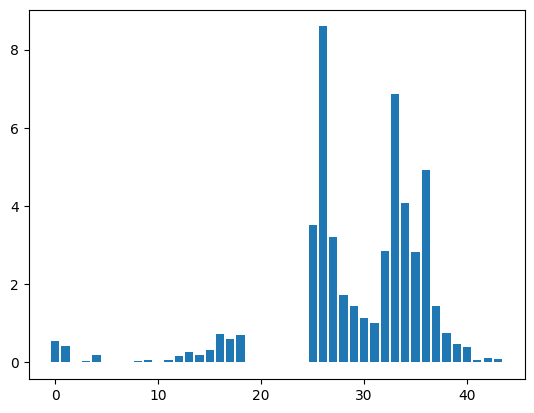

In [ ]:
Xx = columnasTransformer.fit_transform(Xtv)

modelo_LR = LinearRegression(fit_intercept = best_params_LR['LR__fit_intercept'],
                                   n_jobs = -1
                                    )

modelo_LR.fit(Xx.toarray(), np.ravel(ytvLog))

importance_LR = permutation_importance(modelo_LR, Xx.toarray(), np.ravel(ytvLog), n_repeats=100)

for i, v in enumerate(importance_LR['importances_mean']):
    print('Feature: %0d, Score: %.5f' % (i, v))

plt.bar([x for x in range(len(importance_LR['importances_mean']))], importance_LR['importances_mean']),
importance_RF['importances_mean']
plt.show()

#**Ejercicio-12.**

**Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con respecto a MAPE. Incluye tus conclusiones finales de la actividad.**

Como se mencionó anteriormente el modelo de **Random Forest** fue el que mostró mejores valores de las métricas en el conjunto de validación en comparación con el modelo de **Regresión Lineal** ya que si bien las métricas del conjunto de validación son similares al Random Forest, en este último son un poco mejores, por otro lado **Perceptrón Multicapa** los valores de sus métricas entre el conjunto de entrenamiento y validación son similares a los de la regresión lineal, siendo mejores en el entrenamiento pero aun así aceptables y con posibilidad de mejorar, sin embargo es importante mencionar que los puntajes son mejores en  el Random Forest.

En todos los casos, podemos concluir que se tiene quizá un error asociado a la varianza de los datos, donde éste puede mitigarse agregando más datos en el entrenamiento para que los modelos sigan aprendiendo, tomando en cuenta que los modelos siempre tienen un error irreducible (ruido natural de los datos).

Comparando con el resultado del artículo de de Moro, S., Rita, P., & Vala, B con el Random Forest y la Regresión Lineal de este ejercicio tenemos un porcentaje de error absoluto medio (MAPE) de 9.2% y 9.3% vs 27,2% y del 26,9% del artículo, con esto observamos que los resultados del artículo están muy por arriba de los obtenidos en este ejercicio, es decir, podríamos pensar que nuestros modelos están sobreentrenados, no obstante es importante menciocnar que este ejercicio trabaja con una muestra de los datos mientras que los autores del artículo usan el todal de la información, y muy probablemente la varianza que aportan los datos que no tenemos son los que incrementan el error a 27.2 y 26.9 pero respecto al sesgo creemos que ambos ejercicios tienen modelos que tienen un buen desempeño.

###**Fin de la Actividad de la semana 7.**